<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# Python for Finance (2nd ed.)

**Mastering Data-Driven Finance**

&copy; Dr. Yves J. Hilpisch | The Python Quants GmbH

<img src="http://hilpisch.com/images/py4fi_2nd_shadow.png" width="300px" align="left">

# Trading Strategies (a)

## Simple Moving Averages

### Data Import

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
from pylab import mpl, plt

In [2]:
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [5]:
raw = pd.read_csv('tr_eikon_eod_data.csv',
                  index_col=0, parse_dates=True)
data_cmc = pd.read_csv('crypto-markets.csv')
data_cmc['date'] = pd.to_datetime(data_cmc['date'])
data_cmc.index = pd.DatetimeIndex(data_cmc['date'])
symbol = 'bitcoin'
data_symbol = pd.DataFrame(data_cmc['close'].loc[data_cmc['slug'] == symbol])
raw['bitcoin'] = data_symbol

In [6]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2216 entries, 2010-01-01 to 2018-06-29
Data columns (total 13 columns):
AAPL.O     2138 non-null float64
MSFT.O     2138 non-null float64
INTC.O     2138 non-null float64
AMZN.O     2138 non-null float64
GS.N       2138 non-null float64
SPY        2138 non-null float64
.SPX       2138 non-null float64
.VIX       2138 non-null float64
EUR=       2216 non-null float64
XAU=       2211 non-null float64
GDX        2138 non-null float64
GLD        2138 non-null float64
bitcoin    1350 non-null float64
dtypes: float64(13)
memory usage: 242.4 KB


In [7]:
symbol = 'AAPL.O'

In [8]:
data = (
    pd.DataFrame(raw[symbol])
    .dropna()
)

### Trading Strategy

In [9]:
SMA1 = 42  
SMA2 = 252  

In [10]:
data['SMA1'] = data[symbol].rolling(SMA1).mean()  
data['SMA2'] = data[symbol].rolling(SMA2).mean()  

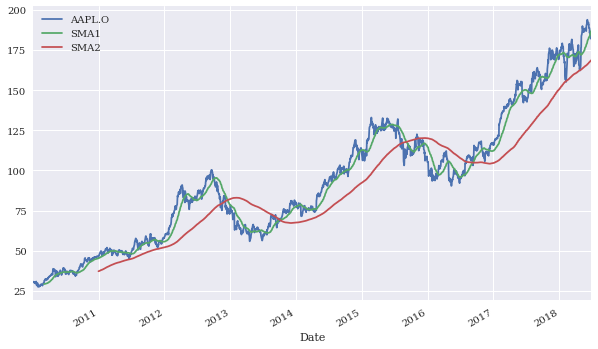

In [11]:
data.plot(figsize=(10, 6));
# plt.savefig('../../images/ch15/strat_plot_01.png')

In [12]:
data.dropna(inplace=True)

In [13]:
data['Position'] = np.where(data['SMA1'] > data['SMA2'], 1, -1)  

In [14]:
data.iloc[480:500,]

,AAPL.O,SMA1,SMA2,Position
Date,,,,
2012-11-28,83.277060,86.238180,80.260548,1
2012-11-29,84.194202,85.925391,80.381432,1
2012-11-30,83.611345,85.647075,80.501659,1
2012-12-03,83.741345,85.398096,80.617299,1
2012-12-04,82.263546,85.107400,80.723827,1
2012-12-05,76.970252,84.656184,80.808347,1
2012-12-06,78.177708,84.249533,80.895781,1
2012-12-07,76.178495,83.843615,80.976450,1
2012-12-10,75.688624,83.475081,81.056229,1


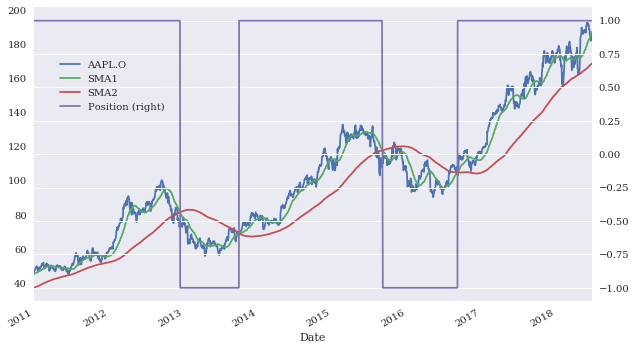

In [15]:
ax = data.plot(secondary_y='Position', figsize=(10, 6))
ax.get_legend().set_bbox_to_anchor((0.25, 0.85));
# plt.savefig('../../images/ch15/strat_plot_02.png')

### Vectorized Backtesting

In [16]:
data['Returns'] = np.log(data[symbol] / data[symbol].shift(1))  

In [17]:
data['Strategy'] = data['Position'].shift(1) * data['Returns']  

In [18]:
data.round(4).head()

,AAPL.O,SMA1,SMA2,Position,Returns,Strategy
Date,,,,,,
2010-12-31,46.0800,45.2810,37.1207,1,NaN,NaN
2011-01-03,47.0814,45.3497,37.1862,1,0.0215,0.0215
2011-01-04,47.3271,45.4126,37.2525,1,0.0052,0.0052
2011-01-05,47.7142,45.4661,37.3223,1,0.0081,0.0081
2011-01-06,47.6757,45.5226,37.3921,1,-0.0008,-0.0008


In [19]:
data.iloc[480:500,]

,AAPL.O,SMA1,SMA2,Position,Returns,Strategy
Date,,,,,,
2012-11-28,83.277060,86.238180,80.260548,1,-0.003151,-0.003151
2012-11-29,84.194202,85.925391,80.381432,1,0.010953,0.010953
2012-11-30,83.611345,85.647075,80.501659,1,-0.006947,-0.006947
2012-12-03,83.741345,85.398096,80.617299,1,0.001554,0.001554
2012-12-04,82.263546,85.107400,80.723827,1,-0.017805,-0.017805
2012-12-05,76.970252,84.656184,80.808347,1,-0.066509,-0.066509
2012-12-06,78.177708,84.249533,80.895781,1,0.015566,0.015566
2012-12-07,76.178495,83.843615,80.976450,1,-0.025905,-0.025905
2012-12-10,75.688624,83.475081,81.056229,1,-0.006451,-0.006451


In [20]:
data.dropna(inplace=True)

In [21]:
data[['Returns', 'Strategy']]

,Returns,Strategy
Date,,
2011-01-03,0.021500,0.021500
2011-01-04,0.005205,0.005205
2011-01-05,0.008147,0.008147
2011-01-06,-0.000809,-0.000809
2011-01-07,0.007136,0.007136
...,...,...
2018-06-25,-0.014983,-0.014983
2018-06-26,0.012330,0.012330
2018-06-27,-0.001465,-0.001465


In [22]:
ret_an = (data[['Returns', 'Strategy']].mean()) * 252
ret_an

Returns     0.185803
Strategy    0.235138
dtype: float64

In [21]:
vol_an = np.sqrt(data[['Returns', 'Strategy']].var() * 252)
vol_an

Returns     0.250571
Strategy    0.250407
dtype: float64

In [22]:
sr_an = ret_an / vol_an
sr_an

Returns     0.741516
Strategy    0.939025
dtype: float64

In [23]:
years = len(data) / 252
years

7.484126984126984

In [24]:
np.exp(data[['Returns', 'Strategy']].sum())

Returns     4.017148
Strategy    5.811299
dtype: float64

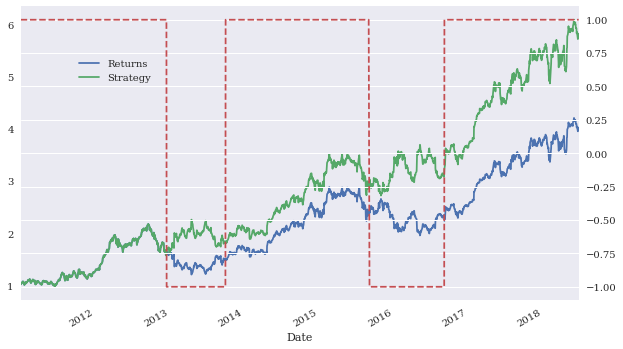

In [25]:
ax = data[['Returns', 'Strategy']].cumsum(
        ).apply(np.exp).plot(figsize=(10, 6))
data['Position'].plot(ax=ax, secondary_y='Position', style='--')
ax.get_legend().set_bbox_to_anchor((0.25, 0.85));
# plt.savefig('../../images/ch15/strat_plot_03.png');

### Optimization

In [26]:
from itertools import product

In [27]:
sma1 = range(20, 61, 4)  
sma2 = range(180, 281, 10)  

In [28]:
list(sma1)

[20, 24, 28, 32, 36, 40, 44, 48, 52, 56, 60]

In [29]:
list(sma2)

[180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280]

In [30]:
results = pd.DataFrame()
plot_paths = pd.DataFrame()
for SMA1, SMA2 in product(sma1, sma2):  
    data = pd.DataFrame(raw[symbol])
    data.dropna(inplace=True)
    data['Returns'] = np.log(data[symbol] / data[symbol].shift(1))
    data['SMA1'] = data[symbol].rolling(SMA1).mean()
    data['SMA2'] = data[symbol].rolling(SMA2).mean()
    data.dropna(inplace=True)
    data['Position'] = np.where(data['SMA1'] > data['SMA2'], 1, -1)
    data['Strategy'] = data['Position'].shift(1) * data['Returns']
    data.dropna(inplace=True)
    perf = np.exp(data[['Returns', 'Strategy']].sum())
    
    ret_an = (data[['Returns', 'Strategy']].mean()) * 252
    vol_an = np.sqrt(data[['Returns', 'Strategy']].var() * 252)
    sr_an = ret_an / vol_an
    years = len(data) / 252
     
    results = results.append(pd.DataFrame(
                {'SMA1': SMA1, 'SMA2': SMA2,
                 'MARKET': perf['Returns'],
                 'STRATEGY': perf['Strategy'],
                 'OUT': perf['Strategy'] - perf['Returns'],
                 'RET_STRATEGY' : ret_an['Strategy'],
                 'RET_RETURNS' : ret_an['Returns'],
                 'VOLA_STRATEGY' : vol_an['Strategy'],
                 'VOLA_RETURNS' : vol_an['Returns'],
                 'SR_STRATEGY' : sr_an['Strategy'],
                 'SR_RETURNS' : sr_an['Returns'],
                 't-stat_STRATEGY' : sr_an['Strategy'] * np.sqrt(years),
                 't-stat_RETURNS' : sr_an['Returns'] * np.sqrt(years)},
                 index=[0]), ignore_index=True)  

In [31]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 13 columns):
SMA1               121 non-null int64
SMA2               121 non-null int64
MARKET             121 non-null float64
STRATEGY           121 non-null float64
OUT                121 non-null float64
RET_STRATEGY       121 non-null float64
RET_RETURNS        121 non-null float64
VOLA_STRATEGY      121 non-null float64
VOLA_RETURNS       121 non-null float64
SR_STRATEGY        121 non-null float64
SR_RETURNS         121 non-null float64
t-stat_STRATEGY    121 non-null float64
t-stat_RETURNS     121 non-null float64
dtypes: float64(11), int64(2)
memory usage: 12.4 KB


In [32]:
results.sort_values('OUT', ascending=False).head(7)

,SMA1,SMA2,MARKET,STRATEGY,OUT,RET_STRATEGY,RET_RETURNS,VOLA_STRATEGY,VOLA_RETURNS,SR_STRATEGY,SR_RETURNS,t-stat_STRATEGY,t-stat_RETURNS
56,40,190,4.650342,7.175173,2.524831,0.254927,0.198824,0.248792,0.248996,1.024657,0.798504,2.848872,2.220094
39,32,240,4.045619,6.558690,2.513071,0.249715,0.185566,0.249597,0.249819,1.000472,0.742800,2.745698,2.038543
59,40,220,4.220272,6.544266,2.323994,0.246822,0.189184,0.249093,0.249293,0.990884,0.758882,2.733674,2.093621
46,36,200,4.074753,6.389627,2.314874,0.241165,0.182669,0.248566,0.248764,0.970225,0.734304,2.690599,2.036352
55,40,180,4.574979,6.857989,2.283010,0.247806,0.195706,0.248432,0.248616,0.997483,0.787180,2.780426,2.194220
70,44,220,4.220272,6.469843,2.249571,0.245319,0.189184,0.249099,0.249293,0.984828,0.758882,2.716966,2.093621
101,56,200,4.074753,6.319524,2.244772,0.239731,0.182669,0.248572,0.248764,0.964432,0.734304,2.674535,2.036352


In [33]:
results.sort_values('SR_STRATEGY', ascending=False).head(7)

,SMA1,SMA2,MARKET,STRATEGY,OUT,RET_STRATEGY,RET_RETURNS,VOLA_STRATEGY,VOLA_RETURNS,SR_STRATEGY,SR_RETURNS,t-stat_STRATEGY,t-stat_RETURNS
56,40,190,4.650342,7.175173,2.524831,0.254927,0.198824,0.248792,0.248996,1.024657,0.798504,2.848872,2.220094
39,32,240,4.045619,6.558690,2.513071,0.249715,0.185566,0.249597,0.249819,1.000472,0.742800,2.745698,2.038543
55,40,180,4.574979,6.857989,2.283010,0.247806,0.195706,0.248432,0.248616,0.997483,0.787180,2.780426,2.194220
34,32,190,4.650342,6.787153,2.136811,0.247735,0.198824,0.248821,0.248996,0.995634,0.798504,2.768179,2.220094
45,36,190,4.650342,6.733936,2.083594,0.246717,0.198824,0.248825,0.248996,0.991526,0.798504,2.756756,2.220094
59,40,220,4.220272,6.544266,2.323994,0.246822,0.189184,0.249093,0.249293,0.990884,0.758882,2.733674,2.093621
100,56,190,4.650342,6.702205,2.051863,0.246106,0.198824,0.248828,0.248996,0.989061,0.798504,2.749902,2.220094


In [34]:
results.loc[(results['SR_STRATEGY'] == results['SR_STRATEGY'].max())]

,SMA1,SMA2,MARKET,STRATEGY,OUT,RET_STRATEGY,RET_RETURNS,VOLA_STRATEGY,VOLA_RETURNS,SR_STRATEGY,SR_RETURNS,t-stat_STRATEGY,t-stat_RETURNS
56,40,190,4.650342,7.175173,2.524831,0.254927,0.198824,0.248792,0.248996,1.024657,0.798504,2.848872,2.220094


In [35]:
t_statistic = results['t-stat_STRATEGY'].loc[(results['SR_STRATEGY'] == results['SR_STRATEGY'].max())].item()
t_statistic

2.848871942240287

In [36]:
from scipy.stats import t
years = len(data) / 252
p_s = (1 - t.cdf(t_statistic, years - 1)) * 2
p_s

0.027354907535034556

In [37]:
# 1 - t.cdf(2.91, 199)

In [38]:
p_m = 1 - (1 - p_s) ** 121
p_m

0.9651275560415539

In [39]:
SMA1 = results['SMA1'].loc[(results['SR_STRATEGY'] == results['SR_STRATEGY'].max())].item()
SMA2 = results['SMA2'].loc[(results['SR_STRATEGY'] == results['SR_STRATEGY'].max())].item()

data = pd.DataFrame(raw[symbol])
data.dropna(inplace=True)
data['Returns'] = np.log(data[symbol] / data[symbol].shift(1))
data['SMA1'] = data[symbol].rolling(SMA1).mean()
data['SMA2'] = data[symbol].rolling(SMA2).mean()
data.dropna(inplace=True)
data['Position'] = np.where(data['SMA1'] > data['SMA2'], 1, -1)
data['Strategy'] = data['Position'].shift(1) * data['Returns']
data.dropna(inplace=True)
perf = np.exp(data[['Returns', 'Strategy']].sum())

ret_an = (data[['Returns', 'Strategy']].mean()) * 252
vol_an = np.sqrt(data[['Returns', 'Strategy']].var() * 252)
sr_an = ret_an / vol_an
years = len(data) / 252

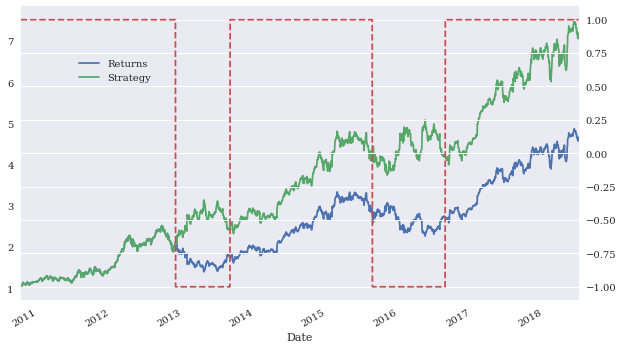

In [40]:
ax = data[['Returns', 'Strategy']].cumsum(
        ).apply(np.exp).plot(figsize=(10, 6))
data['Position'].plot(ax=ax, secondary_y='Position', style='--')
ax.get_legend().set_bbox_to_anchor((0.25, 0.85));

<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

<a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:training@tpq.io">training@tpq.io</a>